In [1]:
## Running Decision Tree
##Basic Decision Tree

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')



In [2]:
## Running Decision Tree
'''
Create a Decision Tree for the model 
'''
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pydot

#Categorize data for comparison later 
data['diagnosis'] = data['diagnosis'].astype('category')
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B':0})


#Remove unneeded data
try:
    data.drop('Unnamed: 32',axis = 1 ,inplace = True)
    data.drop('id', axis =1, inplace= True)
except:
    pass

#Split data for validation process
folds = StratifiedKFold(shuffle = True)

#Assign labels and data
X = data.drop('diagnosis', axis=1)
Y = data['diagnosis']

#Get randomized training data from training set
x_train, x_hold, y_train, y_hold = train_test_split(X,Y,test_size = 0.25)
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_hold.shape)

tree= DecisionTreeClassifier()
#Set parameters to search between
tree_params = {'max_depth':range(5,10), 'max_features': range(3,10), 'criterion': ['gini', 'entropy']}
trees_all = GridSearchCV(tree, tree_params, cv=folds, scoring='accuracy')

#Fit data to tree
try:
    trees_all.fit(x_train, y_train)
    #Find optimal parameters based on parameters from before    
    print(trees_all.best_params_, trees_all.best_score_)
except ValueError:
    print('Restart Kernel')
    

Train data shape:  (426, 30)
Test data shape:  (143, 30)
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 9} 0.9460191518467852


Accuracy Score:  0.9370629370629371
Recall Score:  0.9607843137254902
Precision Score:  0.875

Confusion Matrix:


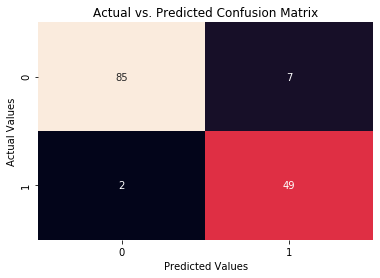

In [3]:
#Predit classification based on model
tree_prediction = trees_all.predict(x_hold)

#Check Scores 
print ("Accuracy Score: ", accuracy_score(y_hold, tree_prediction))
print ("Recall Score: ", recall_score(y_hold, tree_prediction))
print ("Precision Score: ", precision_score(y_hold, tree_prediction))

print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_hold, tree_prediction)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()


#Export Decision Tree to Graph
tree_graph = export_graphviz(trees_all.best_estimator_, class_names = ['benign', 'malignant'], feature_names = X.columns,out_file = 'tree.dot', filled = True)


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1} 0.962435020519836
Accuracy Score:  0.9790209790209791
Recall Score:  0.9803921568627451
Precision Score:  0.9615384615384616

Confusion Matrix:


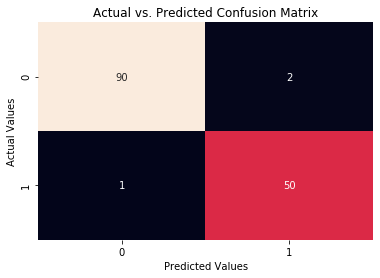

In [4]:
##Random Forest
forest_params = {'max_depth':range(5,10), 'max_features': range(1,10), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1,3)}

#Run Classifier using all processors (optimal speed, computationally intensive)
forest = RandomForestClassifier(n_jobs = -1)

forest_all = GridSearchCV(forest, forest_params, cv=folds, scoring='accuracy')

#Fit data to tree
try:
    forest_all.fit(x_train, y_train)
    #Find optimal parameters based on parameters from before    
    print(forest_all.best_params_, forest_all.best_score_)
except ValueError:
    print('Restart Kernel')

    
#Predit classification based on model
forest_prediction = forest_all.predict(x_hold)

#Check Scores 
print ("Accuracy Score: ", accuracy_score(y_hold, forest_prediction))
print ("Recall Score: ", recall_score(y_hold, forest_prediction))
print ("Precision Score: ", precision_score(y_hold, forest_prediction))

print("\nConfusion Matrix:")
conf_mat2 = confusion_matrix(y_hold, forest_prediction)
sns.heatmap(conf_mat2, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()


#Export Decision Tree to Graph
forest_graph = export_graphviz(forest_all.best_estimator_.estimators_[7], class_names = ['benign', 'malignant'], feature_names = X.columns,out_file = 'forest.dot', filled = True)
